# Example: Generating compounds for different targets

First you need to set up PCMol via the installation script (setup.sh) and set ***pcmol*** conda environment as the kernel of choice.

## Loading the model

The model is automatically downloaded when running the setup script.

In [46]:
import pcmol
pcmol = pcmol.Runner(model_id='XL', checkpoint=7, inference=True)

Loading model from /home/andrius/pcmol/data/models/XL
Loading config from /home/andrius/pcmol/data/models/XL/config.yaml
Loaded model XL, parameter count: 101340995               
Model directory: /home/andrius/pcmol/data/models/XL20241107-093805, checkpoint: 7


## Generating compounds for individual targets

After loading the pretrained model we can generate molecules for particular protein targets using their accession ids.

In [2]:
protein_id = 'Q99685'
generated_df = pcmol.targetted_generation(protein_id=protein_id, batch_size=2, repeat=10, verbose=False)
generated_df.head()

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 18/18 [00:00<00:00, 1013.89it/s]


,target,train,valid,logP,MW,HBA,HBD,qed,tpsa,rotatable_bonds,aromatic_rings,num_rings,heavy_atoms
O=C1OCc2cc(C(=O)N3CCC(C(=O)c4ccc(Sc5ccc(C(F)(F)F)cc5)cc4)CC3)ccc21,Q99685,1,True,6.26210,525.122164,5.0,0.0,None,63.68,5.0,3.0,5.0,37.0
O=C(OC(C(F)(F)F)C(F)(F)F)N1CCC(n2ncc3ccc(C(=O)N4CCC5CN(C(=O)c6ccncc6)COC5C4)cc32)CC1,Q99685,1,True,4.65880,668.218187,8.0,0.0,None,110.10,4.0,3.0,6.0,47.0
Cc1cc(F)ccc1OCC1CCN(C(=O)c2cccs2)CC1,Q99685,1,True,4.12682,333.119878,3.0,0.0,None,29.54,4.0,2.0,3.0,23.0
None,Q99685,1,False,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
O=C(Oc1ccc(-c2ccccc2)cc1)N1CCN(C(=O)c2ccon2)CC1,Q99685,1,True,3.29840,377.137556,5.0,0.0,None,75.88,3.0,3.0,4.0,28.0


## Define a simple function for visualizing the generated molecules

The function will generate 20 molecules and display the valid ones in a grid.

In [28]:
from chemFilters.img_render import MolGridPlotter
plotter = MolGridPlotter(from_smi=True, size=(100,100))

def generate_and_visualize(protein_id, batch_size=2, repeat=10):
    generated_df = pcmol.targetted_generation(protein_id=protein_id, batch_size=batch_size, repeat=repeat, verbose=False)
    filtered = generated_df[generated_df.valid==True].index.tolist()[:16]
    return plotter.mol_grid_png(filtered, n_cols=4)

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 33/33 [00:00<00:00, 1139.19it/s]


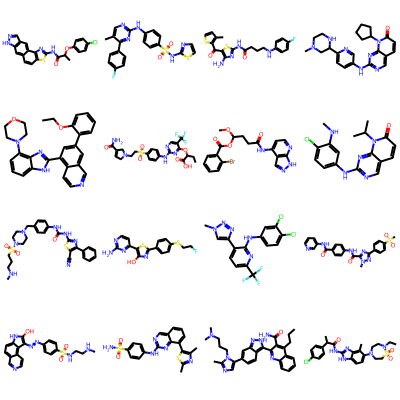

In [29]:
# Cyclin Dependent Kinase 2
generate_and_visualize(protein_id='P24941')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 33/33 [00:00<00:00, 1265.55it/s]


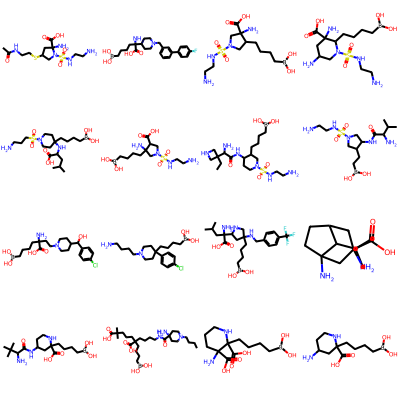

In [30]:
# Arginase-2
generate_and_visualize(protein_id='P78540')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 33/33 [00:00<00:00, 1214.18it/s]


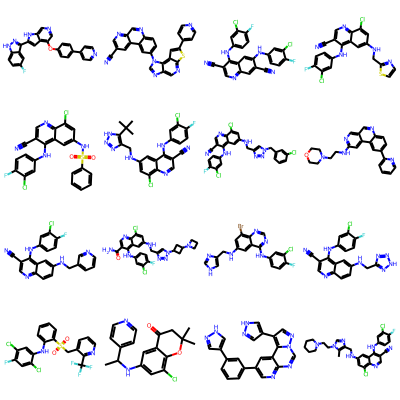

In [31]:
# D(2) dopamine receptor
generate_and_visualize(protein_id='P41279')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 81/81 [00:00<00:00, 854.28it/s]


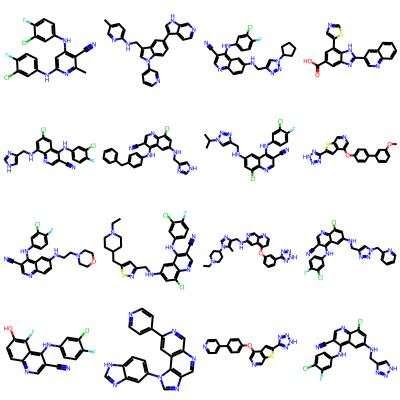

In [36]:
# Mitogen-activated protein kinase
generate_and_visualize(protein_id='P41279')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 81/81 [00:00<00:00, 974.75it/s]


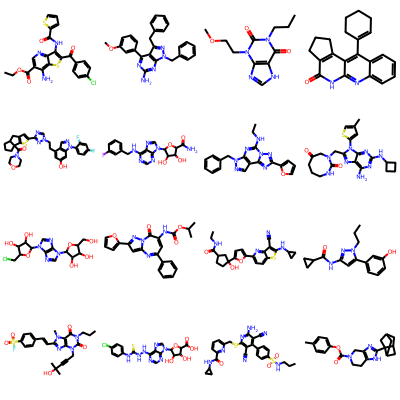

In [37]:
generate_and_visualize(protein_id='P30542')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 81/81 [00:00<00:00, 1142.69it/s]


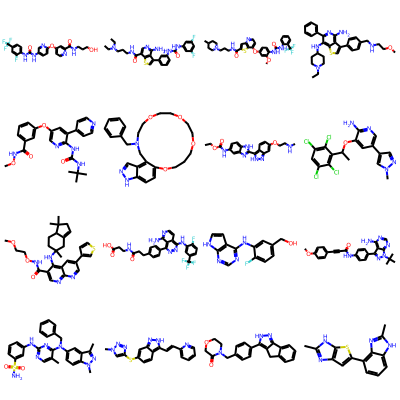

In [38]:
generate_and_visualize(protein_id='P17948')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 81/81 [00:00<00:00, 985.02it/s]


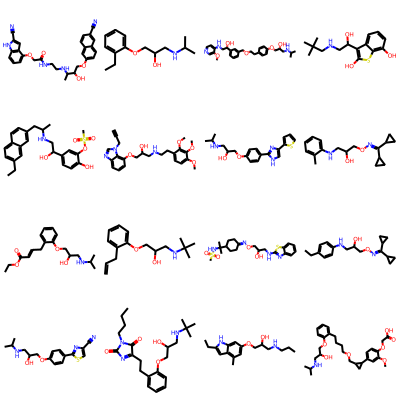

In [39]:
generate_and_visualize(protein_id='P18090')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 81/81 [00:00<00:00, 1188.27it/s]


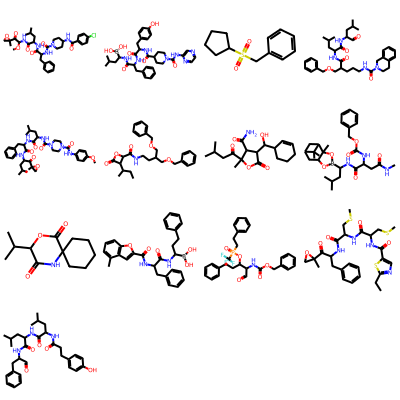

In [40]:
generate_and_visualize(protein_id='P25043')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 81/81 [00:00<00:00, 1170.51it/s]


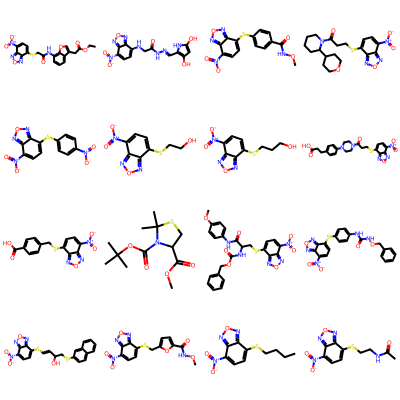

In [41]:
generate_and_visualize(protein_id='P28161')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 81/81 [00:00<00:00, 1184.27it/s]


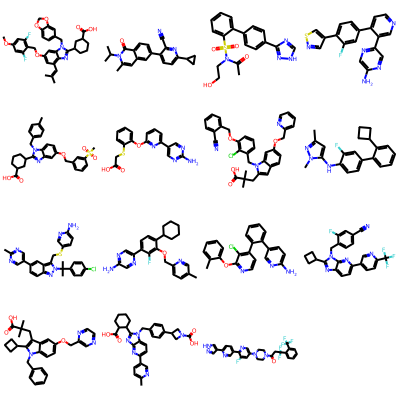

In [42]:
generate_and_visualize(protein_id='P30355')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 81/81 [00:00<00:00, 1164.25it/s]


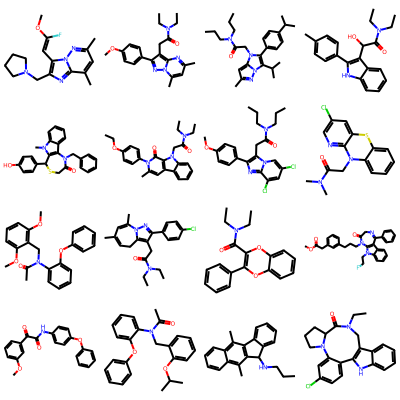

In [43]:
generate_and_visualize(protein_id='P30536')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 81/81 [00:00<00:00, 1024.15it/s]


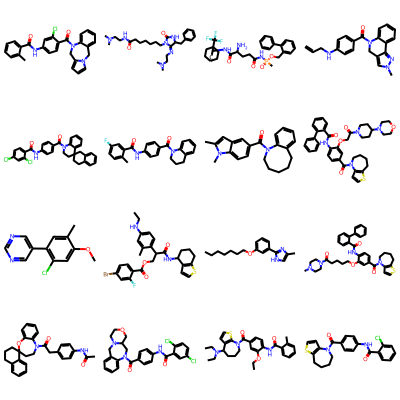

In [44]:
generate_and_visualize(protein_id='P48044')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 81/81 [00:00<00:00, 1167.29it/s]


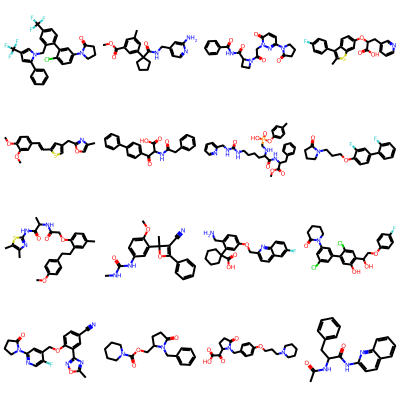

In [45]:
generate_and_visualize(protein_id='P63279')